# Regresja liniowa z regularyzacją

**UWAGA**: w tym notebooku znajduje się sporo tekstu, ale jego druga połowa to duże zadanie.

### Czytanka
Fajne tutoriale, dostarczające sporo intuicji:
* https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
* https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
* Obszerny przykład, omawiający charakterystykę obydwu metod regularyzacji i wpływ doboru parametrów na sposób dopasowania: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
* Konkurs na Kaggle, który dostarcza przydatnego zbioru danych: https://www.kaggle.com/apapiu/regularized-linear-models
* Opis implementacji: http://www.geeksforgeeks.org/linear-regression-python-implementation/
* (*) Implementacja prostej regresji liniowej (od zera): http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/
* (\**) Implementacja regresji dla wielu zmiennych: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/
* Gradient descent: https://en.wikipedia.org/wiki/Gradient_descent

### Podstawowe info
#### 1. Regresja w wielu wymiarach:
Bardzo często chcemy dopasować prostą do danych o większej wymiarowości. Przykładowo, cena domu może zależeć od jego powierzchni, ilości pokoi i ilości pięter (w praktyce takich cech danych może być bardzo dużo). Na szczęście idea jest w zasadzie identyczna, jak przy jednowymiarowej regresji z poprzednich zajęć. Zwróćmy uwagę, że gdy umiemy dopasowywać funkcję liniową w wielu wymiarach, możemy robić różne zagraniczne tricki: nikt nie broni nam sztucznie stworzyć sobie nowych zmiennych, będących nieliniowymi przekształceniami istniejących zmiennych. W ten sposób za pomocą jednego algorytmu możemy dopasowywać zarówno funkcje liniowe, jak i np. wielomiany. (Więcej: na zajęciach). <img src="images/dataset.jpg">

Swoją drogą, w internecie wymiennie można znaleźć pojęcia "multi(ple) regression" i "multivariate regression". Można założyć, że pierwsza z nich odnosi się do funkcji z wielowymiarową dziedziną, ale jednowymiarową przeciwdziedziną, natomiast to drugie: z wielowymiarową dziedziną i przeciwdziedziną.

#### 2. **Gradient descent**:
O ile dla małych/prostych zbiorów danych jesteśmy w stanie wyliczyć najlepsze dopasowanie analitycznie (por. MOwNiT 1, laboratorium), o tyle w praktyce zajęłoby to zbyt dużo czasu. Na szczęście minimalizować funkcję błędu możemy heurystycznie, za pomocą poruszania się w kierunku największego spadku. Intuicja: to tak, jakbyśmy chcieli znaleźć najniższe miejsce w jakiejś kotlinie poprzez rzucenie na ziemię metalowej kulki i sprawdzenie, gdzie się zatrzyma.
<img src="images/gradient_descent.png">
Tak prosta metoda może dość łatwo "utknąć" w minimum lokalnym, ale na szczęście funkcje, z którymi mamy do czynienia przy regresji liniowej są bardzo porządne i mają tylko jedno minimum.

#### 3. **Regularyzacja**:
Intuicja podpowiada "im więcej cech danych, tym lepiej je zrozumiemy". Niestety, życie (i konkursy na Kaggle) uczy, że to błędna intuicja. Część zmiennych nie wnosi żadnej informacji, dane są zaszumione, a czasem informacja jest redundantna. Co się dzieje, jeśli dwie cechy są mocno skorelowane? Jeśli są również mocno skorelowane z wartością, którą przewidujemy, zaczniemy tak naprawdę liczyć tą samą cechę, ale podwójnie (to intuicja, nie poprawne tłumaczenie).


### Pytania
* w jakich sytuacjach zwykła regresja daje złe rezultaty?
* dlaczego chcemy "karać" model za wysokie wagi?

### Zadanie rozgrzewkowe
1. Napisać regresję dla wielu wymiarów.


### Duże zadanie/mały projekt
Zadanie jest z gatunku życiowych, tudzież: przydatnych w karierze zawodowej, więc warto go nie lekceważyć. Będziemy chcieli zrobić coś, co jest chlebem powszednim data scientistów:
0. znaleźć dane
1. wczytać dane do data frame'u
2. wstępnie opisać dane i ew. uzupełnić brakujące
3. narysować wykresy i wypisać podstawowe statystyki
4. wstępnie przetworzyć dane
5. wytrenować modele (zwykła regresja, Lasso, Ridge i dowolny inny model) i sprawdzić ich wydajność

#### 0. znalezienie danych
Dobre będą dla nas jakiekolwiek dane tabelaryczne. Dużo ciekawych danych (a przede wszystkim: konkursów z nimi związanych) można znaleźć na Kagglu, np: https://www.kaggle.com/c/ga-customer-revenue-prediction. Oczywiście są też inne ciekawe strony z danymi, jak choćby https://www.drivendata.org/competitions/.


#### 1. Ładowanie danych
Dane najlepiej załadować do struktury takiej, jak [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Oczywiście można radzić sobie inaczej, ale chyba nie warto.

#### 2. Wstępne opisanie danych i brakujące wartości
Za pomocą metody takiej, jak [`describe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) warto zbadać, co faktycznie jest w dataframie. Często chcemy się pozbyć brakujących danych (choć niektóre metody sobie z nimi nieźle radzą). Praca z brakującymi danymi dobrze opisana jest [tutaj](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

#### 3. Rysowanie wykresów
Dużo metod lepiej działa na "ładnych" danych. Nie mamy już co prawda brakujących wartości, ale to 1/3 sukcesu. W wielu przypadkach chcemy też pozbyć się "outlierów" (przykładowo, jeśli przewidujemy ceny mieszkań i widzimy, że mamy jedno o powierzchni powyżej 10000m^2 i astronomicznej cenie, co zaburza nam wszystkie statystyki). Równie niechętnie patrzymy na skośne rozkłady -- w idealnym świecie wszystkie przypominałyby rozkład normalny. Warto pomyśleć o zlogarytmowaniu całej kolumny, to często pomaga. Wykresy, a zwłaszcza [histogramy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist), pomagają nam lepiej poznać rozkłady poszczególnych kolumn.

#### 4. Przetwarzanie danych
Oprócz usuwania outlierów i prostowania rozkładów możemy chcieć wykonać jeszcze szereg modyfikacji na danych, przykładowo:
* zakodować zmienne kategoryczne jako numerki (https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)
* znormalizować dane
* usunąć szumy
* zmniejszyć wymiarowość

Tutaj użytkownikom Pythona warto polecić moduł [Scikit Learn](https://scikit-learn.org/stable/index.html).

#### 5. trenowanie modeli

Chcemy wytrenować na naszych danych łącznie cztery modele:
* Zwykłą regresję liniową
* Regresję z regularyzacją L1 (Lasso)
* Regresję z regularyzacją L2 (Ridge)
Wszystkie trzy są ładnie opisane [tutaj](https://scikit-learn.org/stable/modules/linear_model.html) oraz w linkach na górze strony.

Warto pamiętać o użyciu [kros-walidacji](https://scikit-learn.org/stable/modules/cross_validation.html) do trenowania modeli.

Będzie nas interesować, oprócz tego, który model osiąga najlepsze wyniki, zależność wyników Lasso i Ridge od doboru parametru regularyzacji (jeśli jest niejasne, jak to należy zrobić, warto zobaczyć kagglowy link z góry strony).

**UWAGA**: tym razem bardzo prosiłbym o sporządzenie PDF-ów z wynikami i opisami eksperymentów. Pliki \*.ipynb też są okej.

Powyższy opis używał przykładów dla języka Python. Dowolny język jest dopuszczalny, ale bardzo możliwe, że najrozsądniejszym wyborem będą jednak te ze zbioru {Python, R, Julia} ze wskazaniem na dwa pierwsze. W Julii dataframe'y są, ale nie mogę ręczyć, że wszystkie powyższe ficzery będą łatwo dostępne.

### Rozwiązanie

Na początku parę importów:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from sklearn import linear_model, metrics

%matplotlib inline

### Zadanie rozgrzewkowe
1. Napisać regresję dla wielu wymiarów.

In [2]:
def gradient_descent(X, y, theta, alpha, it):
    tmp = np.matrix(np.zeros(theta.shape))
    prms = int(theta.ravel().shape[1])
    cost = np.zeros(it)
    
    for i in range(it):
        err = (theta.T * X) - y
        for j in range (prms):
            tmp[0][j] = theta[0][j] - ((alpha / len(X))) * np.sum(np.multiply(err, X[:,j]))
        theta = tmp
        cost[i] = np.sum(np.power(((X * theta.T) - y), 2)) / (2 * len(X))
    
    return theta, cost

#### 0. znalezienie danych
Dobre będą dla nas jakiekolwiek dane tabelaryczne. Dużo ciekawych danych (a przede wszystkim: konkursów z nimi związanych) można znaleźć na Kagglu, np: https://www.kaggle.com/c/ga-customer-revenue-prediction. Oczywiście są też inne ciekawe strony z danymi, jak choćby https://www.drivendata.org/competitions/.


Wybrałem dane z konkursu "House Prices: Advanced Regression Techniques" ze strony Kaggle'a.

#### 1. Ładowanie danych
Dane najlepiej załadować do struktury takiej, jak [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Oczywiście można radzić sobie inaczej, ale chyba nie warto.


In [3]:
data = pd.read_csv("data/train.csv", index_col=0)
data[:10]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


#### 2. Wstępne opisanie danych i brakujące wartości
Za pomocą metody takiej, jak describe warto zbadać, co faktycznie jest w dataframie. Często chcemy się pozbyć brakujących danych (choć niektóre metody sobie z nimi nieźle radzą). Praca z brakującymi danymi dobrze opisana jest tutaj.

In [4]:
data.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Z powyższej tabeli można wywnioskować, iż brakuje wielu wartości, czego efektem są liczne NaN. 

#### Wybór interesujących danych

Wybrałem rok budowy, wielkość powierzchni apartamentu, liczbę sypialni, wielkość powierzchni garażu i cenę. Nie ma brakujących danych.

In [5]:
my_data = data[["YearBuilt", "LotArea", "BedroomAbvGr", "GarageArea", "SalePrice"]]
my_data.describe(include='all')

,YearBuilt,LotArea,BedroomAbvGr,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,10516.828082,2.866438,472.980137,180921.195890
std,30.202904,9981.264932,0.815778,213.804841,79442.502883
min,1872.000000,1300.000000,0.000000,0.000000,34900.000000
25%,1954.000000,7553.500000,2.000000,334.500000,129975.000000
50%,1973.000000,9478.500000,3.000000,480.000000,163000.000000
75%,2000.000000,11601.500000,3.000000,576.000000,214000.000000
max,2010.000000,215245.000000,8.000000,1418.000000,755000.000000


#### 3. Rysowanie wykresów
Dużo metod lepiej działa na "ładnych" danych. Nie mamy już co prawda brakujących wartości, ale to 1/3 sukcesu. W wielu przypadkach chcemy też pozbyć się "outlierów" (przykładowo, jeśli przewidujemy ceny mieszkań i widzimy, że mamy jedno o powierzchni powyżej 10000m^2 i astronomicznej cenie, co zaburza nam wszystkie statystyki). Równie niechętnie patrzymy na skośne rozkłady -- w idealnym świecie wszystkie przypominałyby rozkład normalny. Warto pomyśleć o zlogarytmowaniu całej kolumny, to często pomaga. Wykresy, a zwłaszcza [histogramy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist), pomagają nam lepiej poznać rozkłady poszczególnych kolumn.


Najpierw usuwam punkty, które mogą być outlinerami. Do nich zaliczam mieszkania o powierzchni większej niż 35000 oraz mieszkania zbudowane przed rokiem 1955 (tak stare rzadko kiedy są sprzedawane).

In [6]:
my_data = my_data[my_data.LotArea <= 35000]
my_data  = my_data[my_data.YearBuilt >= 1955]
my_data

,YearBuilt,LotArea,BedroomAbvGr,GarageArea,SalePrice
Id,,,,,
1,2003,8450,3,548,208500
2,1976,9600,3,460,181500
3,2001,11250,3,608,223500
5,2000,14260,4,836,250000
6,1993,14115,1,480,143000
7,2004,10084,3,636,307000
8,1973,10382,3,484,200000
11,1965,11200,3,384,129500
12,2005,11924,4,736,345000


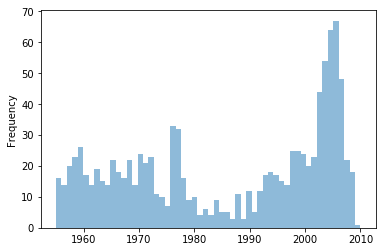

In [7]:
my_data["YearBuilt"].plot.hist(bins=56, alpha=0.5)

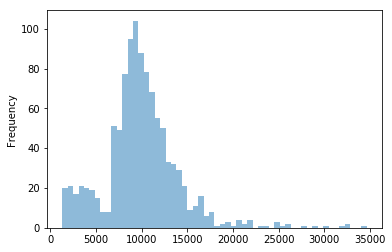

In [8]:
my_data["LotArea"].plot.hist(bins=56, alpha=0.5)

Logarytmuję dane dotyczące wieklości mieszkania, żeby przypominały bardziej rozkład normalny.

In [9]:
my_data["LotArea"] = np.log1p(my_data["LotArea"])

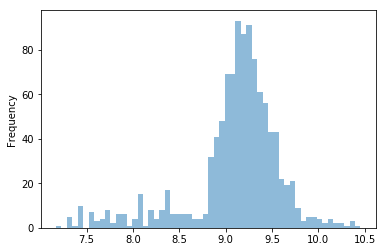

In [10]:
my_data["LotArea"].plot.hist(bins=56, alpha=0.5)

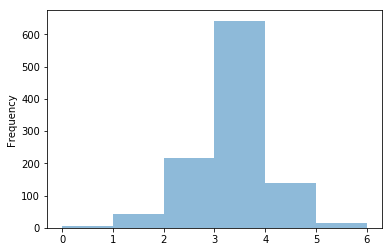

In [11]:
my_data["BedroomAbvGr"].plot.hist(bins=6, alpha=0.5)

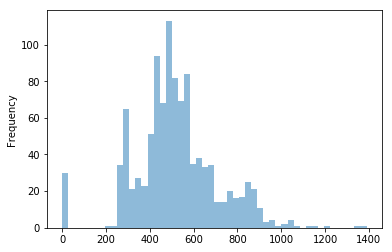

In [12]:
my_data["GarageArea"].plot.hist(bins=50, alpha=0.5)

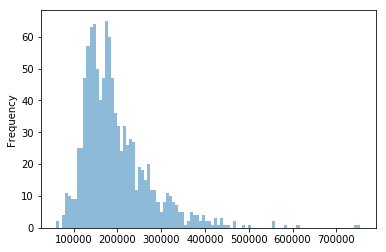

In [13]:
my_data["SalePrice"].plot.hist(bins = 100, alpha=0.5)

Tutaj też logarytmuję wartości.

In [14]:
my_data["SalePrice"] = np.log1p(my_data["SalePrice"])

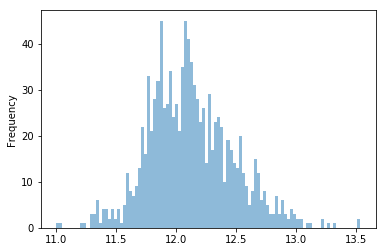

In [15]:
my_data["SalePrice"].plot.hist(bins=100, alpha=0.5)